In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [2]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [3]:
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1','BUN_1','Chol_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2','BUN_2','Chol_2']]

In [4]:
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [7]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [8]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [9]:
psqi_df["CRP_1"] = psqi_df["CRP_1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["CRP_2"] = psqi_df["CRP_2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [10]:
psqi_df.describe()

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000
mean,38.366667,0.305556,23.799644,5.105556,7.700000,0.748889,5.844867,56.086111,34.113333,98.90000,...,19.053333,28.888333,0.862444,114.605556,72.477778,75.644444,81.328889,59.20000,12.984444,190.922222
std,11.589776,0.461927,4.936177,2.893833,4.105985,1.344157,1.412280,8.502880,7.708889,14.43773,...,6.616151,7.098802,0.071696,13.213544,9.091991,10.306814,10.251265,14.01372,3.508550,32.017358
min,20.000000,0.000000,15.231576,0.000000,0.100000,0.000000,2.820000,34.500000,15.100000,63.00000,...,7.700000,11.500000,0.700000,91.000000,57.000000,54.000000,61.000000,29.00000,6.000000,109.000000
25%,29.000000,0.000000,20.833309,3.000000,5.000000,0.200000,4.857500,50.525000,28.975000,92.00000,...,14.200000,24.275000,0.820000,104.000000,67.000000,68.000000,73.875000,49.00000,10.675000,167.750000
50%,35.500000,0.000000,23.422889,5.000000,6.500000,0.300000,5.720000,55.950000,34.000000,95.50000,...,17.950000,28.450000,0.850000,114.000000,71.000000,75.000000,80.500000,57.00000,12.700000,188.000000
75%,46.000000,1.000000,25.502662,7.000000,9.505000,0.700000,6.580000,62.000000,39.000000,102.00000,...,22.125000,33.450000,0.900000,123.000000,77.250000,82.000000,89.000000,69.00000,14.600000,211.000000
max,63.000000,1.000000,67.500000,14.000000,24.700000,11.100000,10.550000,78.400000,55.400000,182.00000,...,46.100000,48.300000,1.070000,158.000000,107.000000,112.000000,118.000000,116.00000,36.400000,296.000000


In [11]:
psqi_df["SEX"].value_counts()

0.0    125
1.0     55
Name: SEX, dtype: int64

In [12]:
psqi_df

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,35,1.0,24.097789,5.0,5.57,0.0,5.82,54.6,35.0,89,...,20.4,26.8,1.00,131.0,74.0,66.0,88.5,53.0,17.5,180.0
1,46,1.0,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90,...,14.5,18.6,0.84,126.0,87.0,108.0,85.0,64.0,14.4,203.0
2,32,1.0,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96,...,17.8,25.6,0.89,131.0,77.0,87.0,81.0,49.0,14.1,196.0
3,33,0.0,20.616175,4.0,3.52,0.0,5.84,39.1,42.1,81,...,12.8,21.9,0.78,102.0,62.0,70.0,69.0,98.0,10.5,224.0
4,28,0.0,18.437500,3.0,2.86,0.0,4.22,49.3,39.3,63,...,12.3,25.6,0.80,106.0,72.0,69.0,61.0,71.0,11.3,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,63,0.0,26.259585,3.0,4.20,0.2,4.78,42.3,47.3,96,...,27.3,39.3,0.94,134.0,89.0,81.0,98.0,66.0,17.1,141.0
176,57,1.0,28.630719,4.0,8.80,3.0,4.60,51.7,34.6,94,...,22.1,25.7,0.95,113.0,76.0,66.0,97.5,51.0,14.6,134.0
177,35,0.0,21.641274,1.0,6.30,0.4,6.34,55.9,34.9,87,...,17.5,29.9,0.84,107.0,72.0,64.0,80.5,49.0,9.7,147.0
178,61,0.0,20.421366,8.0,4.80,0.2,4.88,40.9,48.0,93,...,15.3,29.0,0.81,106.0,76.0,92.0,79.0,60.0,10.2,134.0


In [42]:
#x 배열 생성 (x=AGE, SEX, PSQI, BMI)
X1=psqi_df[['AGE','SEX','BMI_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','BUN_1','Chol_1']]
X2=psqi_df[['AGE','SEX','BMI_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','BUN_2','Chol_2']]
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [43]:
len(X), len(Y)

(360, 360)

In [44]:
X.shape, Y.shape

((360, 24), (360, 1))

# 정규화

In [45]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [46]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [47]:
len(x_train), len(x_test)

(288, 72)

In [48]:
X.shape, Y.shape

((360, 24), (360, 1))

In [49]:
dim=X.shape[1]
dim

24

# MLP

In [50]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 0s - loss: 3479.1494 - mse: 3479.1494
Epoch 2/150
72/72 - 0s - loss: 2809.2605 - mse: 2809.2605
Epoch 3/150
72/72 - 0s - loss: 1752.9126 - mse: 1752.9126
Epoch 4/150
72/72 - 0s - loss: 759.3361 - mse: 759.3361
Epoch 5/150
72/72 - 0s - loss: 335.3536 - mse: 335.3536
Epoch 6/150
72/72 - 0s - loss: 274.1880 - mse: 274.1880
Epoch 7/150
72/72 - 0s - loss: 237.4617 - mse: 237.4617
Epoch 8/150
72/72 - 0s - loss: 209.5995 - mse: 209.5995
Epoch 9/150
72/72 - 0s - loss: 187.7410 - mse: 187.7410
Epoch 10/150
72/72 - 0s - loss: 169.1682 - mse: 169.1682
Epoch 11/150
72/72 - 0s - loss: 154.1734 - mse: 154.1734
Epoch 12/150
72/72 - 0s - loss: 143.0615 - mse: 143.0615
Epoch 13/150
72/72 - 0s - loss: 131.5415 - mse: 131.5415
Epoch 14/150
72/72 - 0s - loss: 122.8230 - mse: 122.8230
Epoch 15/150
72/72 - 0s - loss: 113.0283 - mse: 113.0283
Epoch 16/150
72/72 - 0s - loss: 104.5149 - mse: 104.5149
Epoch 17/150
72/72 - 0s - loss: 98.0532 - mse: 98.0532
Epoch 18/150
72/72 - 0s - loss: 91.7

[122.33626556396484, 122.33626556396484]

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                800       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

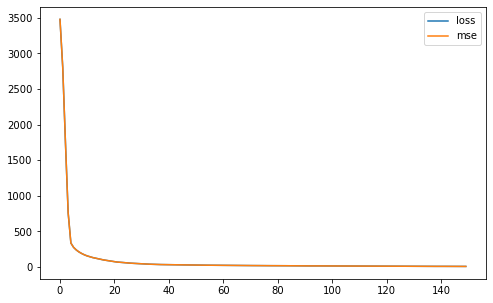

In [52]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [53]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [54]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

#오차 범위 3 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 5 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


#======================================================================================


#오차 범위 20 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도

In [55]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.35 %
test set prediction accuracy: 56.94 %


In [56]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 81.25 % <br>
- test set prediction accuracy(+-3): 34.72 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 95.49 % <br>
- test set prediction accuracy(+-5): 51.39 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 99.65 % <br>
- test set prediction accuracy(+-10): 83.33 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 100.00 % <br>
- test set prediction accuracy(+-20): 97.22 % <br>


In [61]:
#x 배열 생성 (선별)
X1=psqi_df[['SEX','AGE','BMI_1','WBC_1','GLU0_1','ALT_1','TG_1','LDL_1',
            'Muscle_1','Fat_1_x','SBP_1','DBP_1','HR_1','Waist_1','FatPercentage _1']].values
X2=psqi_df[['SEX','AGE','BMI_2','WBC_2','GLU0_2','ALT_2','TG_2','LDL_2',
            'Muscle_2','Fat_2_x','SBP_2','DBP_2','HR_2','Waist_2','FatPercentage_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [62]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [63]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [64]:
len(x_train), len(x_test)

(288, 72)

In [65]:
X.shape, Y.shape

((360, 15), (360, 1))

In [66]:
dim=X.shape[1]
dim

15

# MLP

In [67]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 0s - loss: 3522.6057 - mse: 3522.6057
Epoch 2/150
72/72 - 0s - loss: 2991.9578 - mse: 2991.9578
Epoch 3/150
72/72 - 0s - loss: 2078.3640 - mse: 2078.3640
Epoch 4/150
72/72 - 0s - loss: 1022.8870 - mse: 1022.8870
Epoch 5/150
72/72 - 0s - loss: 434.3903 - mse: 434.3903
Epoch 6/150
72/72 - 0s - loss: 322.1927 - mse: 322.1927
Epoch 7/150
72/72 - 0s - loss: 273.8774 - mse: 273.8774
Epoch 8/150
72/72 - 0s - loss: 239.2340 - mse: 239.2340
Epoch 9/150
72/72 - 0s - loss: 213.4657 - mse: 213.4657
Epoch 10/150
72/72 - 0s - loss: 196.8519 - mse: 196.8519
Epoch 11/150
72/72 - 0s - loss: 185.3632 - mse: 185.3632
Epoch 12/150
72/72 - 0s - loss: 176.4215 - mse: 176.4215
Epoch 13/150
72/72 - 0s - loss: 169.2244 - mse: 169.2244
Epoch 14/150
72/72 - 0s - loss: 163.8345 - mse: 163.8345
Epoch 15/150
72/72 - 0s - loss: 159.5625 - mse: 159.5625
Epoch 16/150
72/72 - 0s - loss: 155.8181 - mse: 155.8181
Epoch 17/150
72/72 - 0s - loss: 153.0180 - mse: 153.0180
Epoch 18/150
72/72 - 0s - loss: 

[130.60394287109375, 130.60394287109375]

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

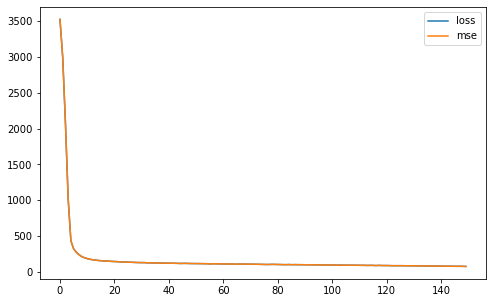

In [69]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [70]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [71]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

#오차 범위 3 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 5 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


#======================================================================================


#오차 범위 20 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도

In [72]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.35 %
test set prediction accuracy: 56.94 %


In [73]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 35.07 % <br>
- test set prediction accuracy(+-3): 19.44 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 48.96 % <br>
- test set prediction accuracy(+-5): 34.72 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 79.17 % <br>
- test set prediction accuracy(+-10): 62.50 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 96.88 % <br>
- test set prediction accuracy(+-20): 93.06 % <br>


In [74]:
#x 배열 생성 (선별 중에 피검사 안하는 거)
X1=psqi_df[['SEX','AGE','BMI_1','Muscle_1','Fat_1_x','FatPercentage _1','SBP_1','DBP_1','HR_1','Waist_1']].values
X2=psqi_df[['SEX','AGE','BMI_2','Muscle_2','Fat_2_x','FatPercentage_2','SBP_2','DBP_2','HR_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [75]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [76]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [77]:
len(x_train), len(x_test)

(288, 72)

In [78]:
X.shape, Y.shape

((360, 10), (360, 1))

In [79]:
dim=X.shape[1]
dim

10

# MLP

In [80]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 0s - loss: 3567.7122 - mse: 3567.7122
Epoch 2/150
72/72 - 0s - loss: 3141.9500 - mse: 3141.9500
Epoch 3/150
72/72 - 0s - loss: 2377.5476 - mse: 2377.5476
Epoch 4/150
72/72 - 0s - loss: 1404.1970 - mse: 1404.1970
Epoch 5/150
72/72 - 0s - loss: 620.1484 - mse: 620.1484
Epoch 6/150
72/72 - 0s - loss: 360.4008 - mse: 360.4008
Epoch 7/150
72/72 - 0s - loss: 301.3846 - mse: 301.3846
Epoch 8/150
72/72 - 0s - loss: 269.0450 - mse: 269.0450
Epoch 9/150
72/72 - 0s - loss: 244.2105 - mse: 244.2105
Epoch 10/150
72/72 - 0s - loss: 221.7361 - mse: 221.7361
Epoch 11/150
72/72 - 0s - loss: 206.7144 - mse: 206.7144
Epoch 12/150
72/72 - 0s - loss: 195.6013 - mse: 195.6013
Epoch 13/150
72/72 - 0s - loss: 187.3375 - mse: 187.3375
Epoch 14/150
72/72 - 0s - loss: 179.7497 - mse: 179.7497
Epoch 15/150
72/72 - 0s - loss: 173.0469 - mse: 173.0469
Epoch 16/150
72/72 - 0s - loss: 170.1583 - mse: 170.1583
Epoch 17/150
72/72 - 0s - loss: 165.5497 - mse: 165.5497
Epoch 18/150
72/72 - 0s - loss: 

[133.7241973876953, 133.7241973876953]

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

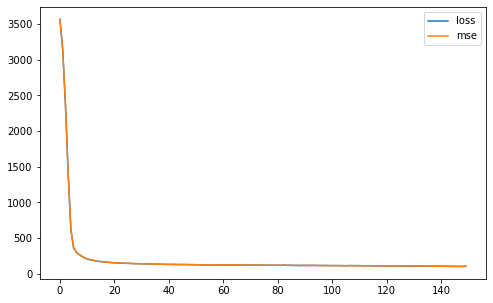

In [82]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [83]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [84]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

#오차 범위 3 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 5 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


#======================================================================================


#오차 범위 20 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도

In [85]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.35 %
test set prediction accuracy: 56.94 %


In [86]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 27.43 % <br>
- test set prediction accuracy(+-3): 18.06 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 44.79 % <br>
- test set prediction accuracy(+-5): 29.17 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 73.26 % <br>
- test set prediction accuracy(+-10): 65.28 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 95.14 % <br>
- test set prediction accuracy(+-20): 91.67 % <br>


# 다쓴거
### <오차범위 3>
- train_all set prediction accuracy(+-3): 88.89 % <br>
- test_all set prediction accuracy(+-3): 31.94 % <br>
<br>

### <오차범위 5>
- train_all set prediction accuracy(+-5): 96.53 % <br>
- test_all set prediction accuracy(+-5): 55.56 % <br>
<br>

### <오차범위 10>
- train_all set prediction accuracy(+-10): 100.00 % <br>
- test_all set prediction accuracy(+-10): 83.33 % <br>
<br>

# 다안쓴거
### <오차범위 3>
- train_some set prediction accuracy(+-3): 32.99 % <br>
- test_some set prediction accuracy(+-3): 27.78 % <br>
<br>

### <오차범위 5>
- train_some set prediction accuracy(+-5): 54.86 % <br>
- test_some set prediction accuracy(+-5): 40.28 % <br>
<br>

### <오차범위 10>
- train_some set prediction accuracy(+-10): 82.29 % <br>
- test_some set prediction accuracy(+-10): 59.72 % <br>
<br>